# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
import time


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words("english"))

from lexical_diversity import lex_div as ld


In [3]:

from keras.preprocessing.text import Tokenizer


#### Setting display width to maximum- veryimportant

In [4]:
pd.set_option('display.max_colwidth', None)


# Data

In [5]:
df= pd.read_excel("clean.xlsx","Alex_Jones")

In [6]:
df1 =pd.read_csv("unigram classes.csv")

# Preprocessing

## Tokenize

In [7]:
dfcopy = df.copy()

In [8]:
dfcopy["Comment"] = dfcopy["Comment"].apply(lambda x : word_tokenize(x))

In [9]:
dfcopy.head()

,Name,Comment
0,Username,"[It, impossible, to, not, love, Alex, Jones]"
1,TheEAGLESEYES,"[blg, was, another, controlled, demolition, the, blg, was, rigged, well, ahead, of, the, date, adrenochrome, is, why, newborns, sell, for, five, hundred, thousand, dollars]"
2,Alex Brock,"[This, is, all, declassified]"
3,Josh Yeager,"[Thank, GOD, for, our, free, speech, WOE, to, those, at, little, brothers, BOOBTUBE, who, would, TRY, to, censor, like, pissing, in, the, wind, an, UNALIENABLE, RIGHT, given, to, us, by, our, CREATOR]"
4,Zic Ky,"[Alex, gets, molested]"


## Remove stop words

In [10]:
dfcopy["Comment"]=dfcopy["Comment"].apply(lambda x : [item for item in x if item not in stop_words])

In [11]:
dfcopy

,Name,Comment
0,Username,"[It, impossible, love, Alex, Jones]"
1,TheEAGLESEYES,"[blg, another, controlled, demolition, blg, rigged, well, ahead, date, adrenochrome, newborns, sell, five, hundred, thousand, dollars]"
2,Alex Brock,"[This, declassified]"
3,Josh Yeager,"[Thank, GOD, free, speech, WOE, little, brothers, BOOBTUBE, would, TRY, censor, like, pissing, wind, UNALIENABLE, RIGHT, given, us, CREATOR]"
4,Zic Ky,"[Alex, gets, molested]"
...,...,...
38222,memehub,"[need, know, gets, black, long, sleeves]"
38223,Submit to Jesus,"[Speaking, guys, weird, looking, eyes, psychedelics, meet, innerdimensional, entities, look, Zuckerberg, eyes, Tell, thats, true]"
38224,Prod Germa K,"[Didn, know, much, need, Joe, Rogan, Eddie, bravo, Alex, Jones, talk, show, till]"
38225,Luke C,"[No, wonder, Joe, talks, living, The, guy, great, fucking, talker, He, legit, knows, say, everything]"


# UNIGRAM Data

In [12]:
unigramcopy = df1.copy()



In [13]:
unigramcopy.head()

,integer,word,count,class
0,2,the,23135851162,1
1,3,of,13151942776,1
2,4,and,12997637966,1
3,5,to,12136980858,1
4,6,a,9081174698,1


In [14]:
unigramcopy= unigramcopy.drop(columns="class")

In [15]:
unigramcopy.head()

,integer,word,count
0,2,the,23135851162
1,3,of,13151942776
2,4,and,12997637966
3,5,to,12136980858
4,6,a,9081174698


In [16]:
unigramcopy["class"]= pd.cut(unigramcopy["integer"], bins=100, labels=(range(0,100)))

In [17]:
unigramcopy.groupby("class").count()

,integer,word,count
class,,,
0,3334,3333,3334
1,3333,3333,3333
2,3333,3333,3333
3,3334,3333,3334
4,3333,3333,3333
...,...,...,...
95,3333,3333,3333
96,3334,3334,3334
97,3333,3333,3333


In [18]:
unigramcopy["word"] = unigramcopy["word"].astype("str")

In [19]:
unigramcopy["word"]

0             the
1              of
2             and
3              to
4               a
           ...   
333328      gooek
333329     gooddg
333330    gooblle
333331     gollgo
333332      golgw
Name: word, Length: 333333, dtype: object

# Fitting the tokenizer on unigram data

In [20]:
t = Tokenizer()


try:
    t.fit_on_texts(unigramcopy["word"])
except Exception as e:
    print("exception is", e)
    print("data passedin ",unigramcopy["word"])

In [21]:
len(t.word_index)

333332

# Testing the tokenizer

In [22]:
dfcopy.head()

,Name,Comment
0,Username,"[It, impossible, love, Alex, Jones]"
1,TheEAGLESEYES,"[blg, another, controlled, demolition, blg, rigged, well, ahead, date, adrenochrome, newborns, sell, five, hundred, thousand, dollars]"
2,Alex Brock,"[This, declassified]"
3,Josh Yeager,"[Thank, GOD, free, speech, WOE, little, brothers, BOOBTUBE, would, TRY, censor, like, pissing, wind, UNALIENABLE, RIGHT, given, us, CREATOR]"
4,Zic Ky,"[Alex, gets, molested]"


In [23]:
test_text = dfcopy["Comment"]
test_text

0                                                                                                                 [It, impossible, love, Alex, Jones]
1              [blg, another, controlled, demolition, blg, rigged, well, ahead, date, adrenochrome, newborns, sell, five, hundred, thousand, dollars]
2                                                                                                                                [This, declassified]
3        [Thank, GOD, free, speech, WOE, little, brothers, BOOBTUBE, would, TRY, censor, like, pissing, wind, UNALIENABLE, RIGHT, given, us, CREATOR]
4                                                                                                                              [Alex, gets, molested]
                                                                             ...                                                                     
38222                                                                                               

In [24]:
sequences = t.texts_to_sequences(test_text)


In [25]:
sequences[0]

[17, 4446, 371, 4050, 2058]

In [26]:
# Converting sequences lists to numpy array

sequencesarray = np.array(sequences, dtype= object )

In [27]:
sequencesarray[0]

[17, 4446, 371, 4050, 2058]

# IMPORTANT NOTE, YOU HAVE TO PASS TOKENIZED DATA INTO TOKENIZER FOR IT TO ENCODE CORRECTLY. DO NOT PASS IN TEXT FORMAT

In [28]:
test1 = [[292952, 239112]]
t.sequences_to_texts(test1)

['estp entp']

# Classify comments into a class

In [29]:
# Function takes in a list and returns an integer class value. These integers will be saved in a separate list. this list and the sequences will be then made into a dataframe into different columns.

def myfunmode(list) :
    alist=[]
    for w in list:
        alist.append(unigramcopy["class"].iloc[w])
    commentclassmode= stats.mode(alist)[0]
    #print(alist)
    
    return commentclassmode


In [30]:
myfunmode(sequencesarray[0])


array([0])

In [31]:
len(sequencesarray)

38227

In [32]:
commentclassmode=[]


In [33]:
for w in range (len(sequencesarray)) :
    commentclassmode.append(myfunmode(sequencesarray[w]))

In [34]:
len(commentclassmode)

38227

In [35]:
commentclassmode[0]

array([0])

In [36]:
df= pd.DataFrame(sequencesarray)

In [37]:
df["classmode"] = pd.DataFrame(commentclassmode)

In [38]:
df.rename(columns = {0:"comments"}, inplace = True) 

In [39]:
df.head()

,comments,classmode
0,"[17, 4446, 371, 4050, 2058]",0.0
1,"[84541, 385, 3276, 14287, 84541, 33122, 158, 2800, 103, 29713, 565, 765, 3926, 4040, 2020]",0.0
2,"[13, 53164]",0.0
3,"[1286, 691, 43, 2558, 25703, 399, 3425, 87, 685, 28163, 97, 5407, 1900, 96919, 235, 623, 36, 5715]",0.0
4,"[4050, 1685, 56606]",0.0


In [40]:
jreneil= df.groupby("classmode")["comments"]

In [41]:
gbycount= jreneil.count()

In [42]:
gbycount

classmode
0.0     35804
1.0      1456
2.0       320
3.0       124
4.0       133
5.0        31
6.0        37
7.0        18
8.0        19
9.0        18
10.0        6
11.0       11
12.0        3
13.0        9
14.0        6
15.0        5
16.0        5
17.0        6
18.0        2
19.0        3
20.0        3
21.0        8
22.0        7
23.0        2
24.0        1
25.0        1
26.0       12
29.0        1
32.0        1
33.0        2
34.0        1
35.0        1
39.0        1
40.0        1
41.0        2
43.0        1
45.0        1
47.0        2
49.0        1
50.0        2
55.0        1
57.0        1
66.0        1
68.0        1
72.0        1
74.0        1
79.0        1
84.0        2
Name: comments, dtype: int64

Text(0.5, 0, 'Class')

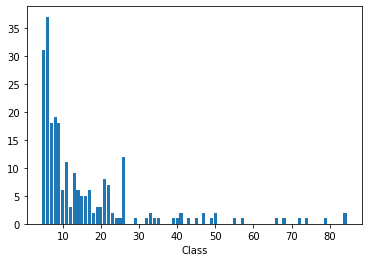

In [43]:
plt.bar(gbycount.index[5:], gbycount[5:])
plt.xlabel("Class")